# Set-Up

Installations and imports:

In [2]:
# !pip install pyacvd tetgen panel

In [3]:
import os
from math import ceil
import pyvista
import matplotlib.pyplot as plt
import sys
import fenics_helpers
import visualisation_helpers

Plotting settings:

In [39]:
# For 2d plots:
pyvista.set_plot_theme('document')
mpl_save_dpi = 300
plot_settings = {}
# For interactive plots:
# plot_settings = {'jupyter_backend': 'panel', 'return_viewer': True}

Save settings:

In [5]:
fig_save_dir = './figs'
if not os.path.isdir(fig_save_dir):
    os.mkdir(fig_save_dir)

Define fixed parameters:

In [26]:
fixed_params = {'num_surfpts': 100,
                'kappa': 3000, # in kPa
                'density': 0.00102, # in g/mm^3
                'g': 9.81, # in m/s^3
                'elem_order': 2,
                'num_load_steps': 10,
                'rtol': 1e-9, 
                'atol': 1e-9, 
                'max_iter': 100,
                'x_to_fix': 10}

# Visualise Breast

## Fixed Nodes

We can now create our mesh:

In [27]:
breast_dir = './breast_closed.obj'
mesh = fenics_helpers.create_breast_mesh(breast_dir, fixed_params['num_surfpts'])

  warnings.warn(

  warnings.warn(



Visualise which nodes are fixed:


Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(



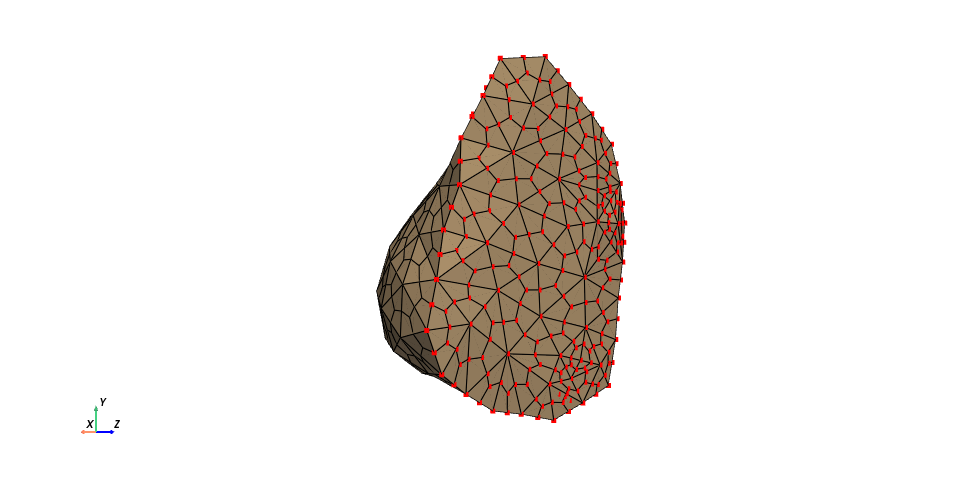

In [40]:
back = mesh.geometry.x[mesh.geometry.x[:,0]<fixed_params['x_to_fix'], :]
p = visualisation_helpers.plot_mesh(mesh, points=back)
p.camera_position = 'yz'
p.camera.roll += 90
p.camera.azimuth += 140
p.show(**plot_settings) 

## Simulations

In [30]:
C_1 = 2.0
angle_combos = [{'z_rot': 0, 'y_rot': 0}, 
                {'z_rot': 90, 'y_rot': 0}, 
                {'z_rot': 180, 'y_rot': 0},
                {'z_rot': 0, 'y_rot': -90},
                {'z_rot': 0, 'y_rot': 90},
                {'z_rot': 180, 'y_rot': -90},
                {'z_rot': 180, 'y_rot': 90}]
u_list = []
for i, angles in enumerate(angle_combos):
    y_rot, z_rot = angles['y_rot'], angles['z_rot']
    print(f"Simulation {i+1}/{len(angle_combos)}: z_rot={y_rot}, y_rot={z_rot}")
    u = fenics_helpers.simulate_neohookean_breast(mesh, C_1=C_1, y_rot=y_rot, z_rot=z_rot, **fixed_params)
    u_list.append({'y_rot': y_rot, 'z_rot': z_rot, 'u': u})

Simulation 1/7: z_rot=0, y_rot=0
Performing load step 1/10...
Performing load step 2/10...
Performing load step 3/10...
Performing load step 4/10...
Performing load step 5/10...
Performing load step 6/10...
Performing load step 7/10...
Performing load step 8/10...
Performing load step 9/10...
Performing load step 10/10...
Simulation 2/7: z_rot=0, y_rot=90
Performing load step 1/10...
Performing load step 2/10...
Performing load step 3/10...
Performing load step 4/10...
Performing load step 5/10...
Performing load step 6/10...
Performing load step 7/10...
Performing load step 8/10...
Performing load step 9/10...
Performing load step 10/10...
Simulation 3/7: z_rot=0, y_rot=180
Performing load step 1/10...
Performing load step 2/10...
Performing load step 3/10...
Performing load step 4/10...
Performing load step 5/10...
Performing load step 6/10...
Performing load step 7/10...
Performing load step 8/10...
Performing load step 9/10...
Performing load step 10/10...
Simulation 4/7: z_rot=-90

Now let's visualise each of these deformations:

z_rot = 0, y_rot = 0


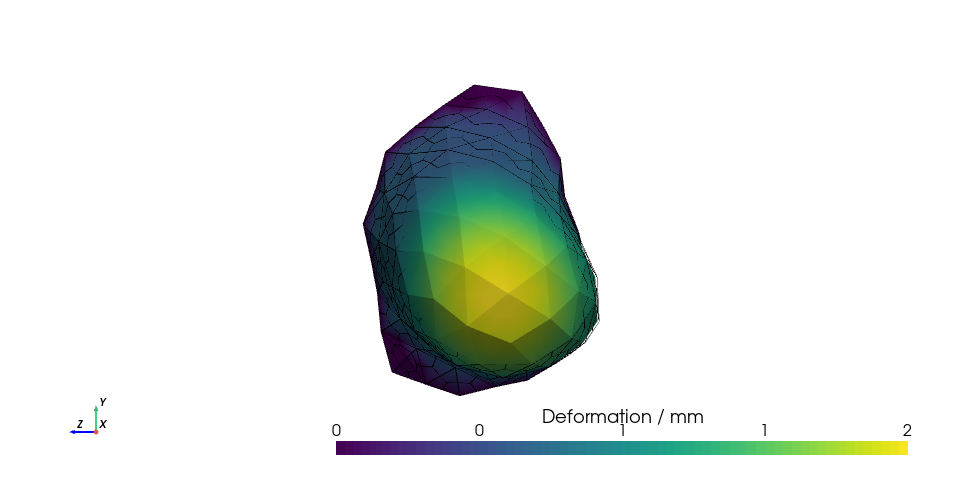

In [41]:
idx = 0
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 90, y_rot = 0


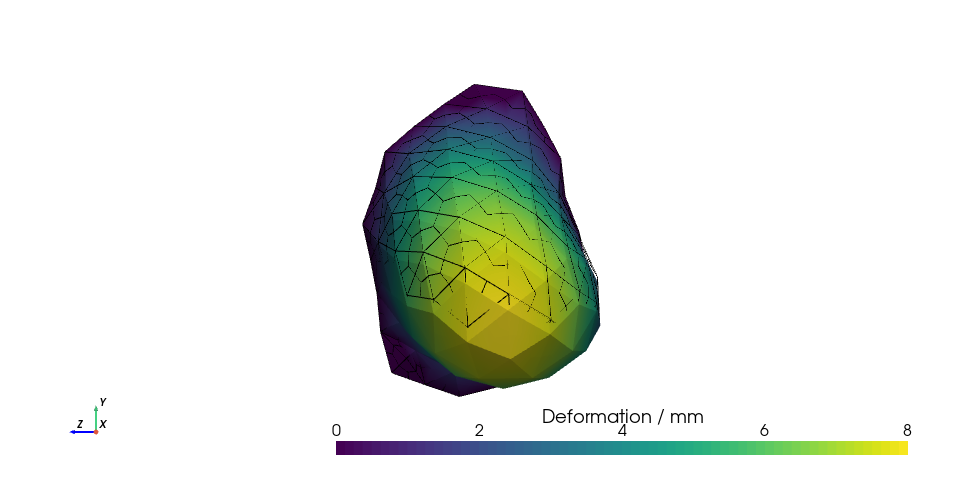

In [42]:
idx = 1
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 180, y_rot = 0


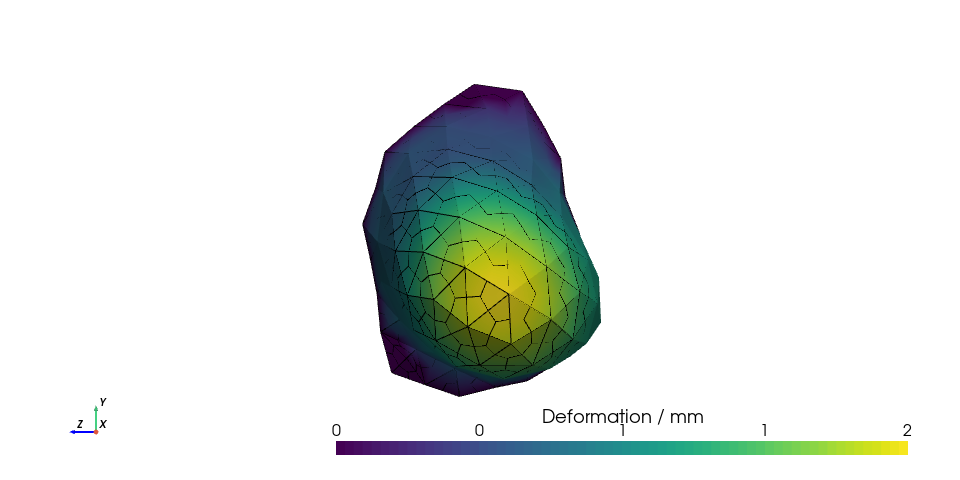

In [43]:
idx = 2
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 0, y_rot = -90


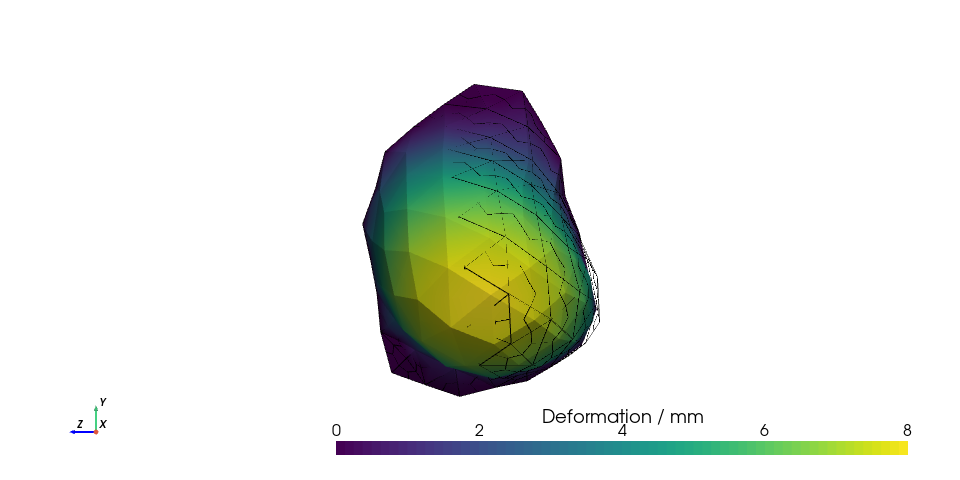

In [44]:
idx = 3
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 0, y_rot = 90


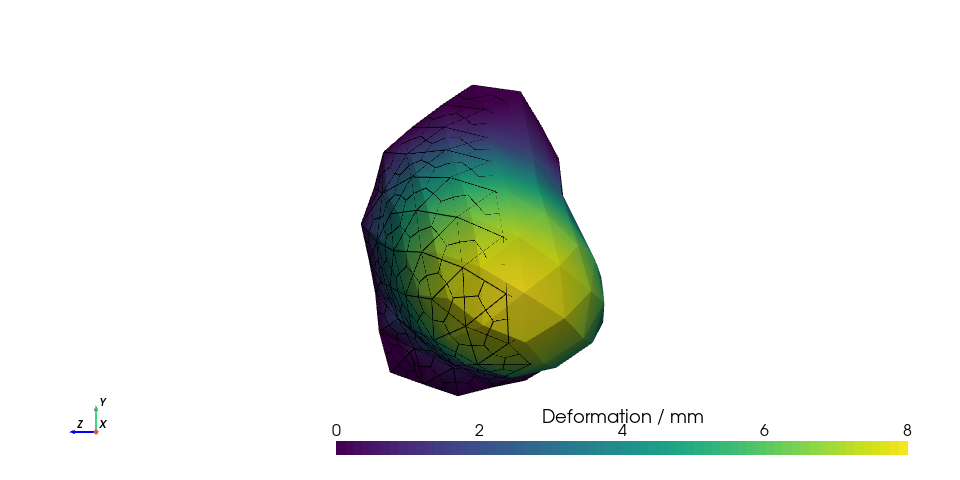

In [45]:
idx = 4
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 180, y_rot = 90


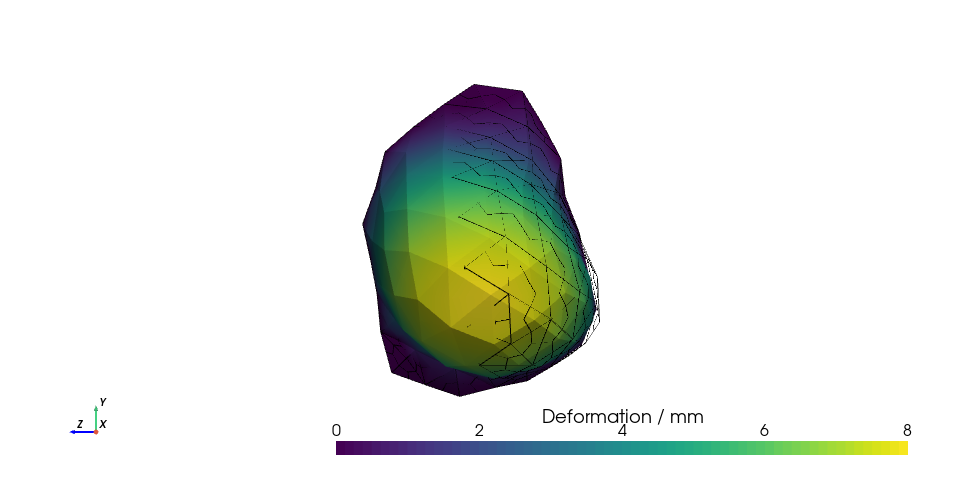

In [46]:
idx = 5
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)

z_rot = 180, y_rot = -90


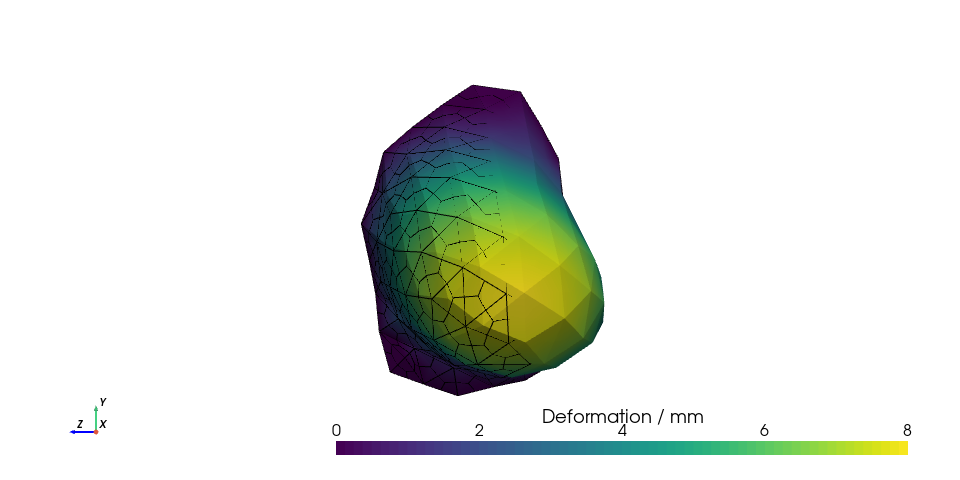

In [47]:
idx = 6
print(f'z_rot = {u_list[idx]["z_rot"]}, y_rot = {u_list[idx]["y_rot"]}')
p = visualisation_helpers.plot_deformation(u_list[idx]['u'], mesh, campos='yz')
p.camera.roll += 90
p.show(**plot_settings)